In [1]:
# unpack gz with pandas
import pandas as pd
import gzip
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ts = pd.read_csv('mar_data.csv')

In [3]:
ts

,time,station_id,longitude,latitude,PM25_Concentration,weather,temperature,humidity,wind_speed,wind_direction,filled
0,2014-05-01 00:00:00,1002,116.20531,40.003950,89.0,0.0,20.0,56.0,7.92,13.0,False
1,2014-05-01 01:00:00,1002,116.20531,40.003950,85.0,0.0,18.0,64.0,7.56,13.0,False
2,2014-05-01 02:00:00,1002,116.20531,40.003950,88.0,0.0,18.0,70.0,5.76,13.0,False
3,2014-05-01 03:00:00,1002,116.20531,40.003950,100.0,0.0,17.0,74.0,6.12,13.0,False
4,2014-05-01 04:00:00,1002,116.20531,40.003950,109.0,0.0,17.0,75.0,4.68,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...
262795,2015-04-30 19:00:00,1036,116.00000,39.579999,77.0,5.0,25.2,48.0,2.60,23.0,False
262796,2015-04-30 20:00:00,1036,116.00000,39.579999,94.0,5.0,25.0,47.0,3.50,23.0,False
262797,2015-04-30 21:00:00,1036,116.00000,39.579999,91.0,5.0,24.7,47.0,3.10,23.0,True
262798,2015-04-30 22:00:00,1036,116.00000,39.579999,88.0,5.0,24.4,47.0,2.70,23.0,False


In [4]:
print(ts.head())

                  time  station_id  longitude  latitude  PM25_Concentration  \
0  2014-05-01 00:00:00        1002  116.20531  40.00395                89.0   
1  2014-05-01 01:00:00        1002  116.20531  40.00395                85.0   
2  2014-05-01 02:00:00        1002  116.20531  40.00395                88.0   
3  2014-05-01 03:00:00        1002  116.20531  40.00395               100.0   
4  2014-05-01 04:00:00        1002  116.20531  40.00395               109.0   

   weather  temperature  humidity  wind_speed  wind_direction  filled  
0      0.0         20.0      56.0        7.92            13.0   False  
1      0.0         18.0      64.0        7.56            13.0   False  
2      0.0         18.0      70.0        5.76            13.0   False  
3      0.0         17.0      74.0        6.12            13.0   False  
4      0.0         17.0      75.0        4.68             1.0   False  


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import networkx as nx
import matplotlib.pyplot as plt


In [18]:
# make plt retina
%config InlineBackend.figure_format = 'retina'

# make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)


[0.5500627046808069, 0.4783404966693464, 0.22046738634527405, 0.5727438770226707, 0.3917943640596554, 0.3550252747852467, 0.34073607240033105, 0.3350087924422232, 0.32437933177609624, 0.22281786900365858, 0.3750462603873988, 0.15112867584434594, 0.18976033451769359, 0.09499904330108776, 0.3357492279776747, 0.25720210061863086, 0.43274478460546706, 0.5388274281477846, 0.12310029853259902, 0.26292258846753647, 0.27876368415625324, 0.25187872529351213, 0.4897666974437253, 0.22375586315846432, 0.2559253687661027, 0.12133215482755641, 0.04325233315464632, 0.03591587479324894, 0.037469071627230226, 0.622428763272441, 0.32202973601764834, 0.649553793042666, 0.42813865607823637, 0.36655998135609563, 0.3883462520334579, 0.4059719751336657, 0.35506384871141555, 0.23927117760662134, 0.49331860700250174, 0.18282149530580857, 0.22106308211073583, 0.12332503638455167, 0.3554098669742079, 0.32890759249338575, 0.34024776322160977, 0.5581807820724954, 0.16509848019307907, 0.3182143972727142, 0.31128471

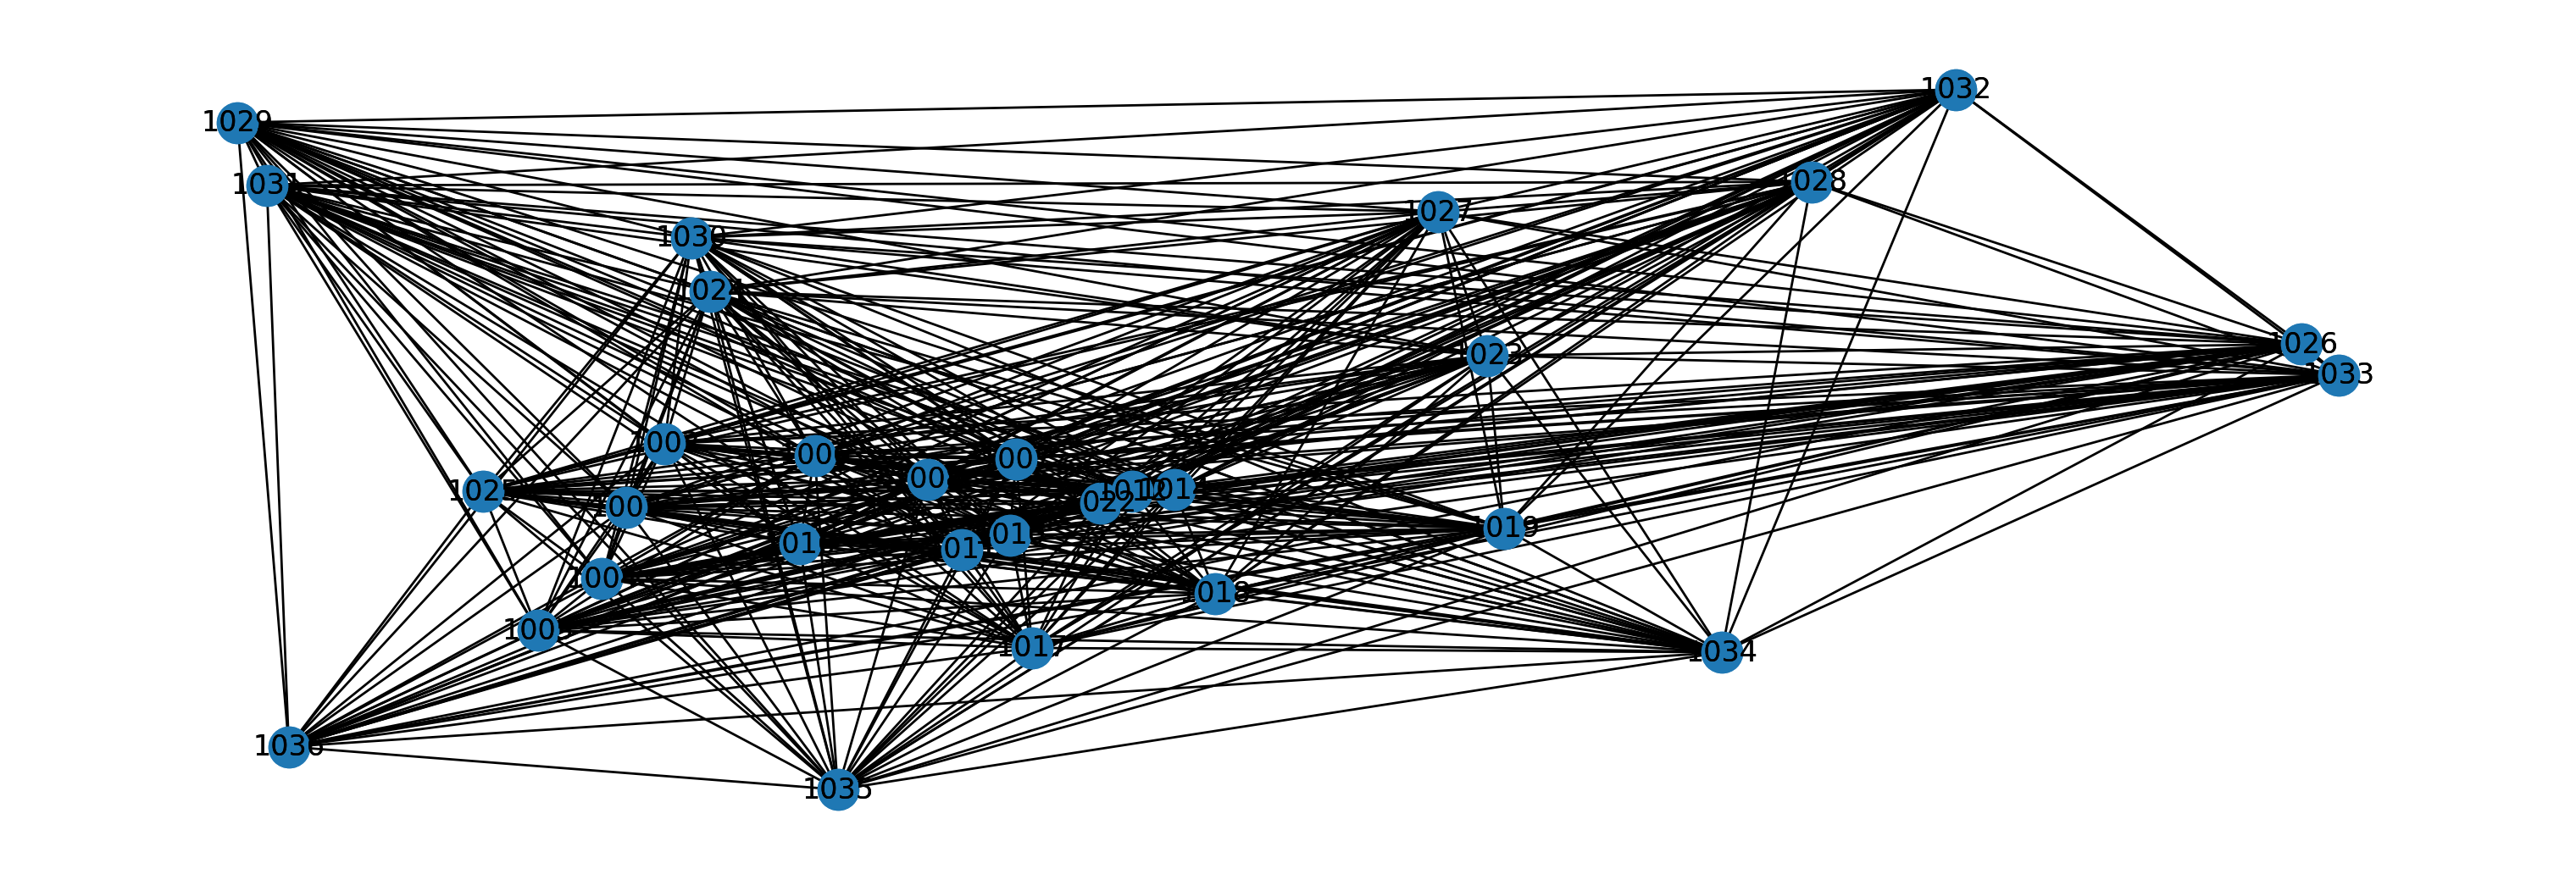

In [19]:
df = ts
# Group the data by station_id and calculate the mean PM2.5 concentration for each station
grouped = df.groupby('station_id')['PM25_Concentration'].mean()

# Create a dictionary where the keys are the station_ids and the values are the mean PM2.5 concentrations
station_pm25 = grouped.to_dict()

# Calculate the Pearson correlation between all pairs of stations
correlations = {}
station_ids = df['station_id'].unique()

for i in range(len(station_ids)):
    for j in range(i+1, len(station_ids)):
        station1 = df[df['station_id'] == station_ids[i]]['PM25_Concentration']
        station2 = df[df['station_id'] == station_ids[j]]['PM25_Concentration']
        correlation, _ = pearsonr(station1, station2)
        correlations[(station_ids[i], station_ids[j])] = correlation

# Create a graph where the nodes are the station_ids and the edges are the Pearson correlations
G = nx.Graph()

# Add nodes to the graph
for station_id in station_ids:
    G.add_node(station_id, pos=(df[df['station_id'] == station_id]['longitude'].values[0],
                               df[df['station_id'] == station_id]['latitude'].values[0]))

# Add edges to the graph
for pair, correlation in correlations.items():
    G.add_edge(*pair, weight=correlation)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
# change edge wdiths to reflect the strength of the correlation
weights = [G[u][v]['weight']**8 for u, v in G.edges()]
print(weights)
nx.draw(G, pos, with_labels=True, width=(weights))
nx.draw(G, pos, with_labels=True)

# Show edge weights
labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [20]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [24]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].view('int64')

# Convert boolean to numeric
df['filled'] = df['filled'].astype(int)


In [35]:
features = df.drop('PM25_Concentration', axis=1)
labels = df['PM25_Concentration']

# Split the data into train, validation, and test sets
features_train, features_temp, labels_train, labels_temp = train_test_split(features, labels, test_size=0.2, random_state=42)
features_val, features_test, labels_val, labels_test = train_test_split(features_temp, labels_temp, test_size=0.5, random_state=42)

# Define the GNN + LSTM model
class GNNLSTM(nn.Module):
    def __init__(self, num_features, hidden_size):
        super(GNNLSTM, self).__init__()
        self.gcn = GCNConv(num_features, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.hidden_size = hidden_size

    def forward(self, data, h):
        x, edge_index = data.x, data.edge_index
        x = self.gcn(x, edge_index)
        x, h = self.lstm(x.unsqueeze(0), h)
        x = self.fc(x.squeeze(0))
        return x, h

# Initialize the model
model = GNNLSTM(num_features=features.shape[1], hidden_size=32)

In [36]:
df['time']

0         1398902400000000000
1         1398906000000000000
2         1398909600000000000
3         1398913200000000000
4         1398916800000000000
                 ...         
262795    1430420400000000000
262796    1430424000000000000
262797    1430427600000000000
262798    1430431200000000000
262799    1430434800000000000
Name: time, Length: 262800, dtype: int64

In [26]:

# Now you can convert to tensors
features_train = torch.tensor(features_train.values, dtype=torch.float)
labels_train = torch.tensor(labels_train.values, dtype=torch.float)
features_val = torch.tensor(features_val.values, dtype=torch.float)
labels_val = torch.tensor(labels_val.values, dtype=torch.float)

In [37]:
# Convert data to PyTorch tensors
# features_train = torch.tensor(features_train, dtype=torch.float)
# labels_train = torch.tensor(labels_train.values, dtype=torch.float)
# features_val = torch.tensor(features_val.values, dtype=torch.float)
# labels_val = torch.tensor(labels_val.values, dtype=torch.float)

# Initialize hidden state for LSTM
h = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

# Use Mean Squared Error (MSE) as the loss function
criterion = nn.MSELoss()

# Use Adam as the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Number of epochs
epochs = 100

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs, h = model(features_train, h)
    loss = criterion(outputs, labels_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Evaluate on validation data
    model.eval()
    with torch.no_grad():
        val_outputs, _ = model(features_val, h)
        val_loss = criterion(val_outputs, labels_val)
    
    # Print loss for every epoch
    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')


AttributeError: 'DataFrame' object has no attribute 'x'

In [31]:
features_train

tensor([[1.4186e+18, 1.0250e+03, 1.1611e+02,  ..., 4.1040e+01, 2.4000e+01,
         0.0000e+00],
        [1.4303e+18, 1.0060e+03, 1.1629e+02,  ..., 8.5000e+00, 2.3000e+01,
         0.0000e+00],
        [1.4210e+18, 1.0100e+03, 1.1639e+02,  ..., 3.0000e+00, 2.3000e+01,
         0.0000e+00],
        ...,
        [1.4008e+18, 1.0220e+03, 1.1644e+02,  ..., 5.7600e+00, 1.3000e+01,
         0.0000e+00],
        [1.4230e+18, 1.0230e+03, 1.1665e+02,  ..., 6.8400e+00, 2.4000e+01,
         0.0000e+00],
        [1.4280e+18, 1.0180e+03, 1.1651e+02,  ..., 5.7600e+00, 2.4000e+01,
         0.0000e+00]])